In [42]:
# 라이브러리 임포트
import pandas as pd
import numpy as np

In [43]:
#!pip install konlpy

# 1. 데이터 불러오기

In [44]:
df = pd.read_csv('./가공데이터/keyword_emotion_sentence_only_train.csv', index_col=0)
# df = pd.read_csv('/content/keyword_emotion_sentence_only_train.csv', index_col=0)

In [45]:
df

,상황키워드,감정_대분류,사람문장
0,"진로,취업,직장",분노,일은 왜 해도 해도 끝이 없을까? 화가 난다. 그냥 내가 해결하는 게 나아. 남들한...
1,"진로,취업,직장",분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나....
2,"진로,취업,직장",분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3,"진로,취업,직장",분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4,"진로,취업,직장",분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나. 상사인 나에게 ...
...,...,...,...
51625,재정,분노,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고....
51626,재정,불안,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나. 마음...
51627,재정,상처,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정...
51628,대인관계,불안,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42874 entries, 0 to 51629
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상황키워드   42874 non-null  object
 1   감정_대분류  42874 non-null  object
 2   사람문장    42874 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [47]:
df['감정_대분류'].value_counts()

불안    9320
분노    9160
상처    9143
슬픔    9125
기쁨    6126
Name: 감정_대분류, dtype: int64

In [48]:
df['사람문장'] = df['사람문장'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_93527/2314435747.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['사람문장'] = df['사람문장'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")


In [49]:
df['사람문장'].head(10)

0    일은 왜 해도 해도 끝이 없을까 화가 난다 그냥 내가 해결하는 게 나아 남들한테 부...
1    이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나 최...
2    회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트...
3    직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 분하고 섭...
4    얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나 상사인 나에게 먼...
5    직장에 다니고 있지만 시간만 버리는 거 같아 진지하게 진로에 대한 고민이 생겨 직장...
6    성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔 나도 섭섭해 부모님께 좀 ...
7    퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고 더 좋은 회사가 기다리고 있을지...
8    졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어 응 느긋함...
9    요즘 직장생활이 너무 편하고 좋은 것 같아 우리 회사는 복지가 정말 좋아 내가 곧 ...
Name: 사람문장, dtype: object

# 2. 감정 분류

In [50]:
emo_df = df

In [51]:
emo_target_df = emo_df['감정_대분류']

In [52]:
emo_sentence_df = emo_df['사람문장']

In [53]:
emo_target_df.value_counts()

불안    9320
분노    9160
상처    9143
슬픔    9125
기쁨    6126
Name: 감정_대분류, dtype: int64

In [54]:
emo_df.loc[(emo_df['감정_대분류']=='불안'), '감정_대분류'] = 0
emo_df.loc[(emo_df['감정_대분류']=='분노'), '감정_대분류'] = 1
emo_df.loc[(emo_df['감정_대분류']=='상처'), '감정_대분류'] = 2 
emo_df.loc[(emo_df['감정_대분류']=='슬픔'), '감정_대분류'] = 3 
emo_df.loc[(emo_df['감정_대분류']=='기쁨'), '감정_대분류'] = 4 

In [55]:
emo_df['감정_대분류'].value_counts()

0    9320
1    9160
2    9143
3    9125
4    6126
Name: 감정_대분류, dtype: int64

In [56]:
emo_target_df = emo_df['감정_대분류']

In [57]:
emo_target_df.value_counts()

0    9320
1    9160
2    9143
3    9125
4    6126
Name: 감정_대분류, dtype: int64

# 3. 텍스트 토큰화 및 Pad_Sequences

In [58]:
from konlpy.tag import Okt
from tqdm import tqdm

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을','한테']
s = open('./stopword.txt')
stopwords = s.read().split()
stopwords

In [61]:
okt = Okt()

In [62]:
tokenized_X_train = []

for sentence in tqdm(emo_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_X_train.append(stopwords_removed_sentence)

100%|██████████| 42874/42874 [01:57<00:00, 365.36it/s]


In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [64]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_X_train)

In [ ]:
print(tokenizer.word_index)

In [66]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 13936
등장 빈도가 2번 이하인 희귀 단어의 수: 5651
단어 집합에서 희귀 단어의 비율: 40.54965556831229
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7271769252558787


In [67]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8286


In [68]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(tokenized_X_train)
X_train = tokenizer.texts_to_sequences(tokenized_X_train)

In [69]:
import numpy as np

y_train = np.array(emo_target_df)

In [70]:
y_train

array([1, 1, 1, ..., 2, 0, 2], dtype=object)

최대 길이 : 78
평균 길이 : 23.378177916686102


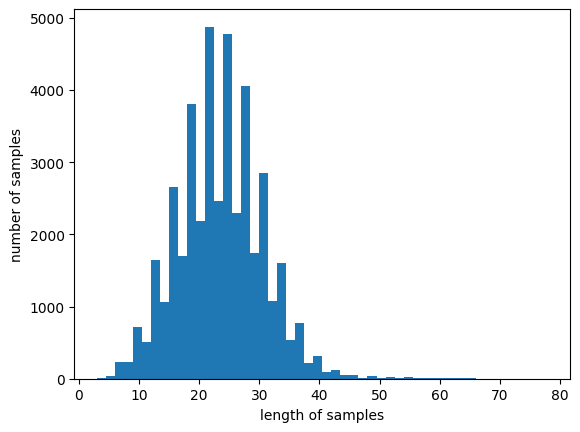

In [71]:
import matplotlib.pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [72]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [73]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 99.72477492186407


In [74]:
X_train = pad_sequences(X_train, maxlen=max_len)


In [75]:
len(y_train)

42874

In [76]:
len(X_train)

42874

# 4. 모델 구축

In [77]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [78]:
y_train = y_train.astype(int)

In [79]:
pd.Series(y_train).value_counts()

0    9320
1    9160
2    9143
3    9125
4    6126
dtype: int64

In [80]:
num = np.unique(y_train, axis=0)
num = num.shape[0]
one_hot_y_train = np.eye(num)[y_train]
one_hot_y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [82]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(5, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('emo_stopwords_change.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, one_hot_y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/50


2023-03-06 16:06:09.637898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-06 16:06:09.865431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-06 16:06:10.124018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


536/536 [==============================] - ETA: 0s - loss: 1.0938 - acc: 0.5619

2023-03-06 16:06:30.435820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-06 16:06:30.517178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.48350, saving model to emo_stopwords_change.h5
536/536 [==============================] - 24s 42ms/step - loss: 1.0938 - acc: 0.5619 - val_loss: 1.3275 - val_acc: 0.4835
Epoch 2/50
536/536 [==============================] - ETA: 0s - loss: 0.7867 - acc: 0.7174
Epoch 2: val_acc improved from 0.48350 to 0.48431, saving model to emo_stopwords_change.h5
536/536 [==============================] - 20s 38ms/step - loss: 0.7867 - acc: 0.7174 - val_loss: 1.2576 - val_acc: 0.4843
Epoch 3/50
536/536 [==============================] - ETA: 0s - loss: 0.6906 - acc: 0.7585
Epoch 3: val_acc improved from 0.48431 to 0.48711, saving model to emo_stopwords_change.h5
536/536 [==============================] - 20s 38ms/step - loss: 0.6906 - acc: 0.7585 - val_loss: 1.3349 - val_acc: 0.4871
Epoch 4/50
535/536 [============================>.] - ETA: 0s - loss: 0.6124 - acc: 0.7845
Epoch 4: val_acc did not improve from 0.48711
536/536 [==============================] 

In [83]:
loaded_model = load_model('emo_stopwords_change.h5')

In [84]:
import re

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(np.argmax(loaded_model.predict(pad_new), axis=-1)) # 예측
  if score == 0:
    print('불안')
  elif score == 1:
    print('분노')
  elif score == 2:
    print('상처')
  elif score == 3:
    print('슬픔')
  elif score == 4:
    print('기쁨')
  # print(f'score = {score}')

# 5. 모델 예측 확인해보기

In [100]:
sentiment_predict('우리 아들이 사춘기라서 어떡하지')

1/1 [==============================] - 1s 1s/step
불안


In [85]:
y_pred = loaded_model.predict(X_train)

2023-03-06 16:09:05.773850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-06 16:09:05.881301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1340/1340 [==============================] - 12s 9ms/step


In [86]:
tmp = np.argmax(loaded_model.predict(X_train), axis=-1) # 예측

1340/1340 [==============================] - 11s 8ms/step


In [87]:
df['추정_감정_대분류'] = pd.DataFrame(tmp)

In [88]:
df.to_csv('outlier_check.csv', index=False)

---

# 6. 검증 데이터 불러오기

In [105]:
test_val_df = pd.read_csv('./가공데이터/keyword_emotion_sentence_only_validation.csv', usecols=[1, 2, 3])
# test_val_df = pd.read_csv('/content/keyword_emotion_sentence_only_validation.csv', index_col=0)

# 7. 검증 데이터 토큰화 및 Pad_Sequences

In [106]:
test_list = []
for sentence in tqdm(test_val_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    test_list.append(stopwords_removed_sentence)

100%|██████████| 5593/5593 [00:16<00:00, 331.33it/s]


In [107]:
X_test = tokenizer.texts_to_sequences(test_list)
X_test = pad_sequences(X_test, maxlen=max_len)

In [108]:
y_pred = loaded_model.predict(X_test)

175/175 [==============================] - 2s 10ms/step


In [109]:
tmp = np.argmax(loaded_model.predict(X_test), axis=-1) # 예측


175/175 [==============================] - 1s 8ms/step


In [110]:
test_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상황키워드   5593 non-null   object
 1   감정_대분류  5593 non-null   object
 2   사람문장    5593 non-null   object
dtypes: object(3)
memory usage: 131.2+ KB


In [111]:
test_val_df['추정_감정_대분류'] = pd.DataFrame(tmp)

In [112]:
def num_to_emo(number):
    if number == 0:
        return '불안'
    elif number == 1:
        return '분노'
    elif number == 2:
        return '상처'
    elif number == 3:
        return '슬픔'
    elif number == 4:
        return '기쁨'

In [113]:
test_val_df['추정_감정_대분류'] = test_val_df['추정_감정_대분류'].apply(num_to_emo)

In [114]:
test_val_df

,상황키워드,감정_대분류,사람문장,추정_감정_대분류
0,"진로,취업,직장",불안,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...,불안
1,"진로,취업,직장",불안,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워. 나에게 너무 크...,불안
2,"진로,취업,직장",불안,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워. 무섭게 생겼는데도 업무를 보려...,불안
3,"진로,취업,직장",불안,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다. 첫 직장...,기쁨
4,"진로,취업,직장",불안,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼. 내가 낯가림이 심해서 친해질 수...,불안
...,...,...,...,...
5588,"연애,결혼,출산",기쁨,남자친구랑 헤어질 뻔했는데 다시 화해했어. 정말 다행이야. 내가 과음하고 실수를 해...,기쁨
5589,"연애,결혼,출산",상처,나 너무 억울하고 속상한 일이 있어. 피곤해서 남자친구 연락에 대답하지 못하고 잠들...,상처
5590,"연애,결혼,출산",상처,친구 결혼식에 갔었는데 내가 안 온 줄 알고 친구가 토라져서 억울해! 바쁜 사정이 ...,상처
5591,"연애,결혼,출산",상처,나는 결혼을 안 하는 건데 주변에서는 결혼을 못 하는 거로 생각해. 강하게 나서서 ...,슬픔


In [115]:
correct_df = test_val_df[test_val_df['감정_대분류'] == test_val_df['추정_감정_대분류']]

In [116]:
len(correct_df) / len(test_val_df)

0.751653853030574

In [118]:
test_val_df.to_csv('tmp_val_data_change_stopwords.csv', index=False)